<a href="https://colab.research.google.com/github/Sunidhi-20/ML-Project/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
airline = pd.read_csv('/content/drive/MyDrive/test.csv')


## Pre Processing

In [ ]:
airline = airline.sample(n=10000)


In [ ]:
airline.shape

(10000, 25)

In [ ]:
refactored_values = {
'Gender': {
    'Male': 0,
    'Female': 1
},
'satisfaction': {
'neutral or dissatisfied': 0,
'satisfied': 1
},
'Class': {
'Business': 0,
'Eco': 1,
'Eco Plus':2
},
 'Customer Type': {
  'Loyal Customer': 0,
  'disloyal Customer': 1,
 },
  'Type of Travel':{
   'Business travel': 0,
   'Personal Travel': 1,
  }
}
airline.replace(refactored_values, inplace=True)

In [ ]:
airline = airline.fillna(airline.mean())

<Axes: ylabel='count'>

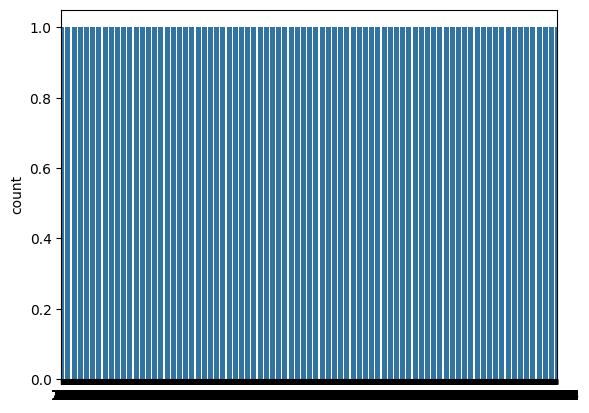

In [ ]:
import seaborn as sns
sns.countplot(airline['satisfaction'])

In [ ]:
x = airline.drop(columns = 'satisfaction', axis = 1)
y = airline['satisfaction']

In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

In [ ]:
oversampler = RandomOverSampler()
X_rs,Y_rs = oversampler.fit_resample(x,y)

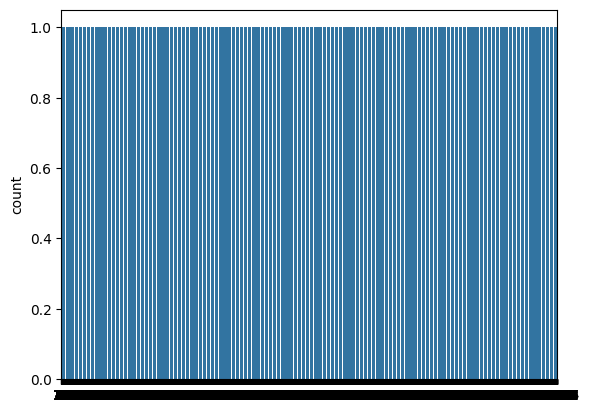

In [ ]:
sns.countplot(Y_rs);

In [ ]:
airline.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
695,695,66179,0,1,21,0,0,550,5,4,...,4,5,4,4,5,5,4,25,18.0,1
22254,22254,104898,0,0,49,0,0,1565,2,2,...,5,5,5,5,4,5,5,0,0.0,1
8067,8067,96150,0,0,54,0,0,3994,5,4,...,3,3,2,3,4,3,4,0,1.0,1
6499,6499,16728,1,0,58,0,1,1167,4,4,...,5,4,2,3,4,4,4,244,261.0,1
22996,22996,78346,0,0,20,1,1,1547,2,4,...,2,4,3,4,4,4,2,0,1.0,0
23118,23118,118422,0,1,20,0,1,646,5,4,...,2,3,2,5,4,4,2,0,0.0,1
16610,16610,53883,0,0,40,1,1,140,2,4,...,3,4,4,4,3,3,3,0,0.0,0
10871,10871,38099,1,0,33,0,0,1674,3,3,...,2,2,2,2,2,2,1,0,0.0,1
15550,15550,112818,1,0,39,0,0,1390,2,2,...,3,3,4,3,3,3,4,9,0.0,1
10180,10180,69531,1,0,47,0,0,2475,5,5,...,3,4,4,4,4,3,4,0,0.0,1


In [ ]:
airline.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [ ]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 695 to 24375
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         10000 non-null  int64  
 1   id                                 10000 non-null  int64  
 2   Gender                             10000 non-null  int64  
 3   Customer Type                      10000 non-null  int64  
 4   Age                                10000 non-null  int64  
 5   Type of Travel                     10000 non-null  int64  
 6   Class                              10000 non-null  int64  
 7   Flight Distance                    10000 non-null  int64  
 8   Inflight wifi service              10000 non-null  int64  
 9   Departure/Arrival time convenient  10000 non-null  int64  
 10  Ease of Online booking             10000 non-null  int64  
 11  Gate location                      10000 non-null  i

In [ ]:
airline.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
airline.dropna(inplace=True)

In [ ]:
airline.shape

(10000, 25)

In [ ]:
airline.describe()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000
mean,13082.011200,64739.22760,0.505400,0.187200,39.445900,0.305100,0.598200,1185.070800,2.725500,3.05870,...,3.354100,3.361600,3.347900,3.620200,3.318500,3.64010,3.286700,14.350800,14.777031,0.43560
std,7477.010137,37628.71827,0.499996,0.390091,15.102718,0.460473,0.621446,993.886788,1.335338,1.52679,...,1.335774,1.287638,1.320318,1.180123,1.266656,1.18191,1.318741,36.019324,36.053160,0.49586
min,0.000000,17.00000,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.00000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.00000
25%,6672.000000,31291.50000,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.00000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000,0.000000,0.000000,0.00000
50%,13107.000000,65146.50000,1.000000,0.000000,40.000000,0.000000,1.000000,835.000000,3.000000,3.00000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000,0.000000,0.000000,0.00000
75%,19525.250000,97364.00000,1.000000,0.000000,51.000000,1.000000,1.000000,1744.000000,4.000000,4.00000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000,12.000000,13.000000,1.00000
max,25975.000000,129814.00000,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.00000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,590.000000,608.000000,1.00000


In [ ]:
for x in airline.select_dtypes(include = 'object'):
      print(airline[x].value_counts())

In [ ]:
airline.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
695,695,66179,0,1,21,0,0,550,5,4,...,4,5,4,4,5,5,4,25,18.0,1
22254,22254,104898,0,0,49,0,0,1565,2,2,...,5,5,5,5,4,5,5,0,0.0,1
8067,8067,96150,0,0,54,0,0,3994,5,4,...,3,3,2,3,4,3,4,0,1.0,1
6499,6499,16728,1,0,58,0,1,1167,4,4,...,5,4,2,3,4,4,4,244,261.0,1
22996,22996,78346,0,0,20,1,1,1547,2,4,...,2,4,3,4,4,4,2,0,1.0,0


In [ ]:
airline.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
9177,9177,125762,0,0,51,0,0,920,1,1,...,4,4,4,4,3,5,3,199,197.0,1
2834,2834,84399,1,0,52,0,1,206,4,5,...,4,4,4,4,2,4,5,0,0.0,1
11805,11805,81786,1,0,35,0,0,1310,4,4,...,5,5,5,5,4,5,5,0,61.0,1
21950,21950,47241,0,1,12,0,1,599,5,0,...,4,3,5,4,4,4,4,0,0.0,1
24375,24375,10315,1,0,48,0,0,2267,5,5,...,5,5,5,5,4,5,3,0,0.0,1


## Visualization

In [ ]:
sns.set_style('darkgrid')

# createing a 3X2 subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(150, 100))
sns.histplot(ax=axs [0, 0], data=airline, x='Age', kde=True)
sns.histplot(ax=axs [0, 1], data=airline, x='Class', kde=True)
sns.histplot(ax=axs[1, 0], data=airline, x='Seat comfort', kde=True)
sns.histplot(ax=axs[1, 1], data=airline, x='Ease of Online booking', kde=True)
sns.histplot(ax=axs[2, 0], data=airline, x='On-board service', kde=True)
sns.histplot(ax=axs[2, 1], data=airline, x='Cleanliness', kde=True)

fig.suptitle('Histograms of Airline Ratings', fontsize=120)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Satification vs cleanliness '}, xlabel='Cleanliness', ylabel='satisfaction'>

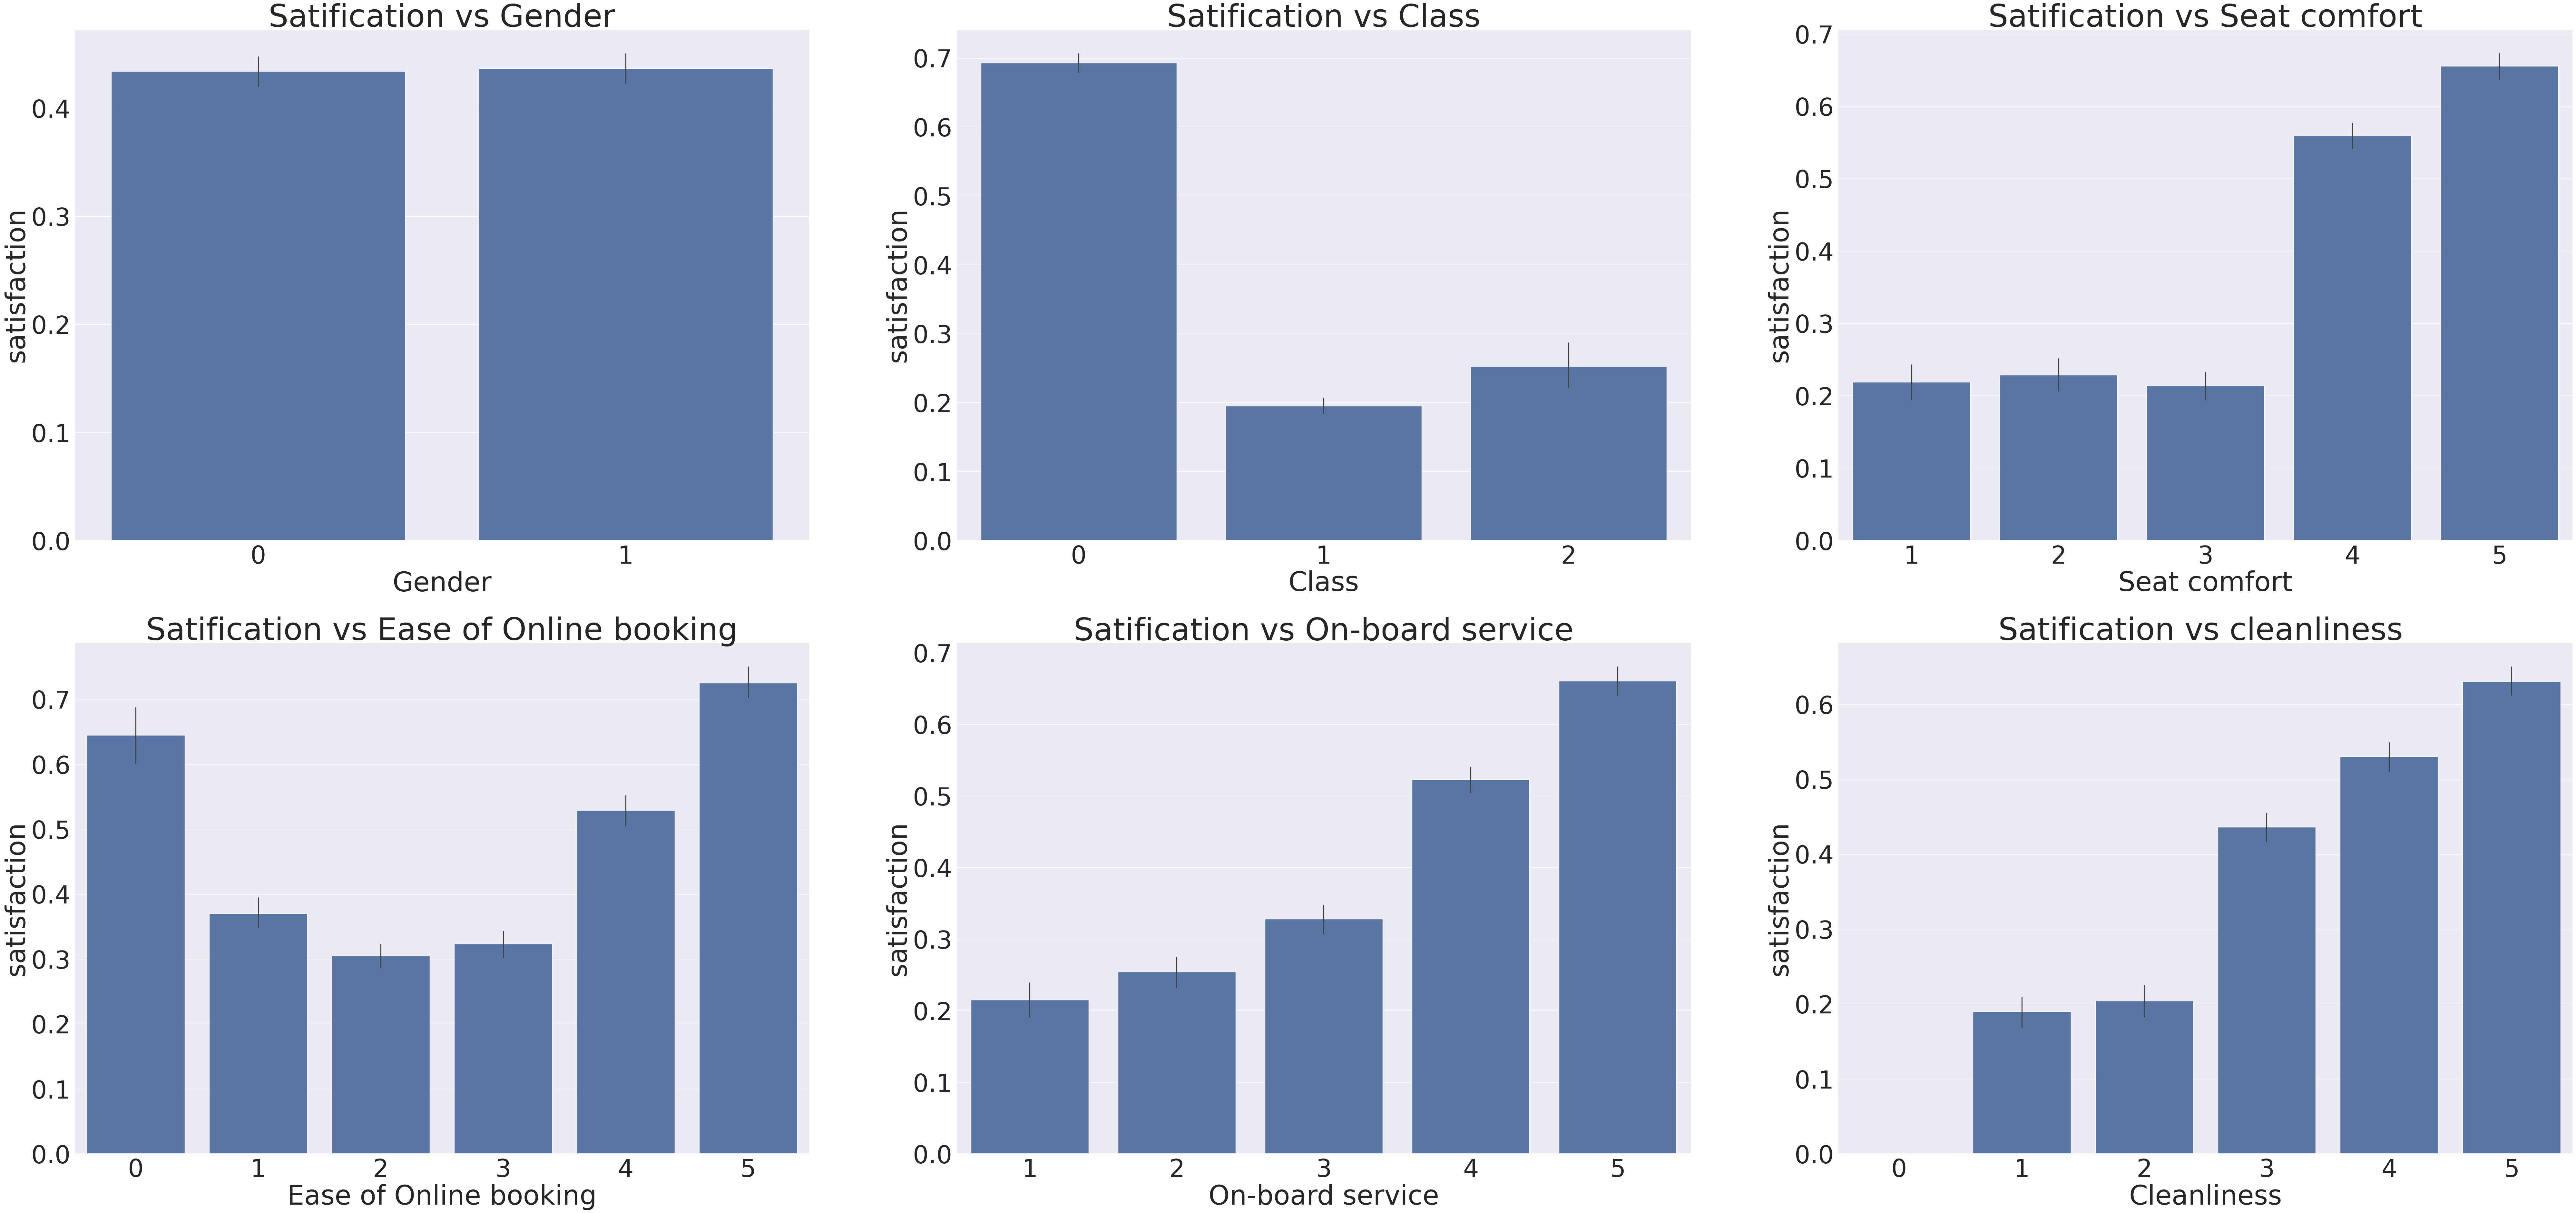

In [ ]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(331)
plt.title("Satification vs Gender", fontsize=70)
sns.barplot(y = 'satisfaction', x = 'Gender', data = airline)
plt.subplot(332)
plt.title("Satification vs Class", fontsize=70)
sns.barplot(y = 'satisfaction', x = 'Class', data = airline)
plt.subplot(333)
plt.title("Satification vs Seat comfort", fontsize=70)
sns.barplot(y = 'satisfaction', x = 'Seat comfort', data = airline)
plt.subplot(334)
plt.title("Satification vs Ease of Online booking", fontsize=70)
sns.barplot(y = 'satisfaction', x = 'Ease of Online booking', data = airline)
plt.subplot(335)
plt.title("Satification vs On-board service", fontsize=70)
sns.barplot(y = 'satisfaction', x = 'On-board service', data = airline)
plt.subplot(336)
plt.title("Satification vs cleanliness ",fontsize=70)
sns.barplot(y = 'satisfaction', x = 'Cleanliness', data = airline)

In [ ]:
airline[["Age", "satisfaction"]].groupby(["Age"], as_index=False).mean().sort_values(by="satisfaction", ascending=False)

,Age,satisfaction
49,56,0.653179
44,51,0.647059
34,41,0.627530
46,53,0.625000
38,45,0.616162
...,...,...
67,74,0.111111
1,8,0.084746
68,75,0.000000
69,76,0.000000


In [ ]:
airline[["Gender", "satisfaction"]].groupby(["Gender"], as_index=False).mean().sort_values(by="satisfaction", ascending=False)

,Gender,satisfaction
1,1,0.436882
0,0,0.434290


In [ ]:
print(y)

695      1
22254    1
8067     1
6499     1
22996    0
        ..
9177     1
2834     1
11805    1
21950    1
24375    1
Name: satisfaction, Length: 10000, dtype: int64


In [ ]:
print(x)

       Unnamed: 0      id  Gender  Customer Type  Age  Type of Travel  Class  \
695           695   66179       0              1   21               0      0   
22254       22254  104898       0              0   49               0      0   
8067         8067   96150       0              0   54               0      0   
6499         6499   16728       1              0   58               0      1   
22996       22996   78346       0              0   20               1      1   
...           ...     ...     ...            ...  ...             ...    ...   
9177         9177  125762       0              0   51               0      0   
2834         2834   84399       1              0   52               0      1   
11805       11805   81786       1              0   35               0      0   
21950       21950   47241       0              1   12               0      1   
24375       24375   10315       1              0   48               0      0   

       Flight Distance  Inflight wifi s

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_rs,Y_rs, test_size=0.25, random_state=2)

In [ ]:
print(X_rs.shape,x_train.shape,x_test.shape)

(11288, 24) (8466, 24) (2822, 24)


In [ ]:
model_accuracy = pd.DataFrame(columns=['Model', 'Accuracy'])

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10)
rf_classifier.fit(x_train,y_train)
prediction=rf_classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[1336   66]
 [ 105 1315]]
0.9394046775336641
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1402
           1       0.95      0.93      0.94      1420

    accuracy                           0.94      2822
   macro avg       0.94      0.94      0.94      2822
weighted avg       0.94      0.94      0.94      2822



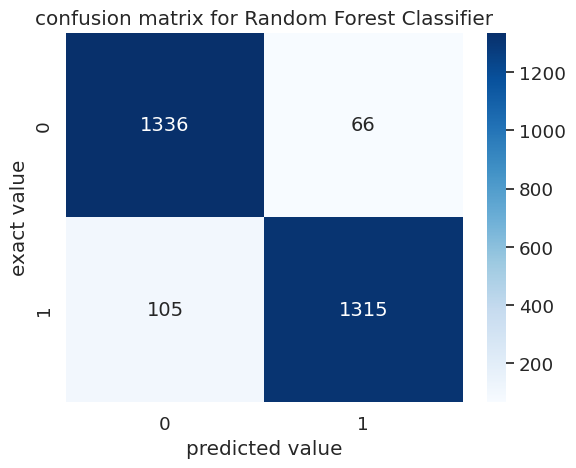

In [ ]:
con_matrrix = confusion_matrix(y_test, prediction)

# Create a heatmap of the confusion matrix
sns.set(font_scale=1.2)
#Heatmap
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 14}, cmap='Blues', fmt='g')

plt.xlabel('predicted value')

plt.ylabel('exact value')

plt.title('confusion matrix for Random Forest Classifier')

plt.show()

In [ ]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',max_features='sqrt',min_samples_leaf=10,random_state=100)
model.fit(x_train,y_train)
predictions=model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[1315   87]
 [ 102 1318]]
0.9330262225372077
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1402
           1       0.94      0.93      0.93      1420

    accuracy                           0.93      2822
   macro avg       0.93      0.93      0.93      2822
weighted avg       0.93      0.93      0.93      2822



In [ ]:
#Randomized Hyper parameter tuning
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
#no, of trees in rf
n_estimators=[int(x) for x in np.linspace(start=10, stop=200, num=10)]
max_features=['auto','sqrt','log2']
max_depth=[int(x) for x in np.linspace(10,100,10)]
min_samples_split=[2,5,10,14]
min_samples_leaf=[1,2,4,6,8]
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'criterion':['entropy','gini']}
print(random_grid)


from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,verbose=2,random_state=100,n_jobs=-1)
rf_randomcv.fit(x_train,y_train)
from sklearn.metrics import accuracy_score
best_random_grid=rf_randomcv.best_estimator_
y_pred=best_random_grid.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}
Fitting 5 folds for each of 50 candidates, totalling 250 fits
0.9493267186392629
[[1338   64]
 [  79 1341]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1402
           1       0.95      0.94      0.95      1420

    accuracy                           0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822



In [ ]:
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf'] + 1,
                         rf_randomcv.best_params_['min_samples_leaf'] + 2],
    'min_samples_split': [ rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] + 1],

    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 20,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 20,]
}

from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [20],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [32, 52, 72]},
             verbose=2)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9493267186392629
[[1338   64]
 [  79 1341]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1402
           1       0.95      0.94      0.95      1420

    accuracy                           0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822



## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_logreg=logreg.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
print(confusion_matrix(y_test,y_pred_logreg))
print('Accuracy:',accuracy_score(y_test,y_pred_logreg))
print('Recall:',recall_score(y_test,y_pred_logreg))
print('Precision:',precision_score(y_test,y_pred_logreg))
print('f1 score:',f1_score(y_test,y_pred_logreg))

[[906 496]
 [625 795]]
Accuracy: 0.6027639971651311
Recall: 0.5598591549295775
Precision: 0.6158017041053447
f1 score: 0.5864994466986352


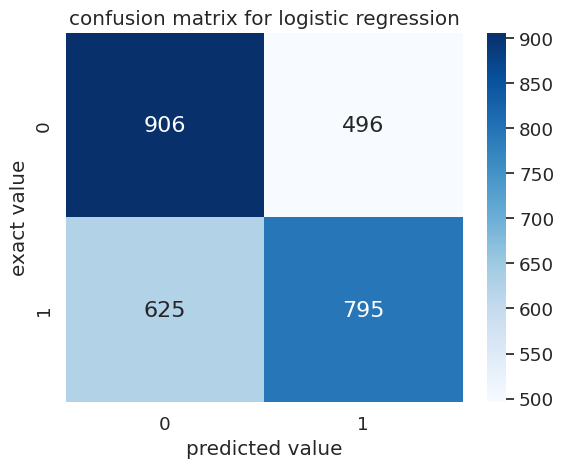

In [ ]:
con_matrrix = confusion_matrix(y_test, y_pred_logreg)
#Create a heatmap of the confusion matrix

sns.set(font_scale=1.2) # Set font size
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') # Create heatmap
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for logistic regression')
plt.show()

## KNN

[[1048  354]
 [ 834  586]]
Accuracy: 0.5790219702338767
Recall: 0.4126760563380282
Precision: 0.6234042553191489
f1 score: 0.4966101694915255


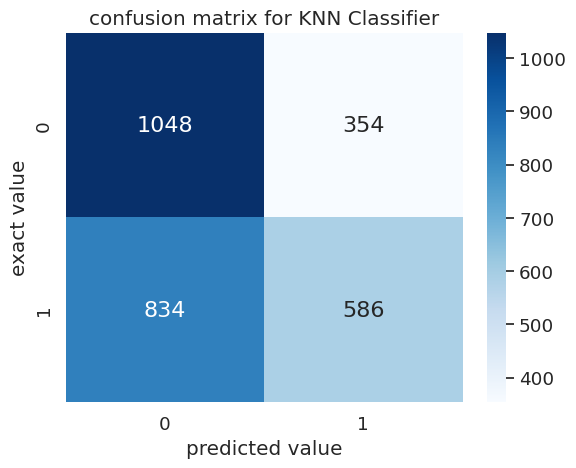

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
print(confusion_matrix(y_test,y_pred_knn))
print('Accuracy:',accuracy_score(y_test,y_pred_knn))
print('Recall:',recall_score(y_test,y_pred_knn))
print('Precision:',precision_score(y_test,y_pred_knn))
print('f1 score:',f1_score(y_test,y_pred_knn))

con_matrrix = confusion_matrix(y_test, y_pred_knn)
sns.set(font_scale=1.2)
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for KNN Classifier')
plt.show()

## SVM

In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='linear',C=0.001) #C controls number of misclassifictaions
clf.fit(x_train,y_train)
y_pred_svm=clf.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_svm))
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[1114  288]
 [ 297 1123]]
0.7927002126151665
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1402
           1       0.80      0.79      0.79      1420

    accuracy                           0.79      2822
   macro avg       0.79      0.79      0.79      2822
weighted avg       0.79      0.79      0.79      2822



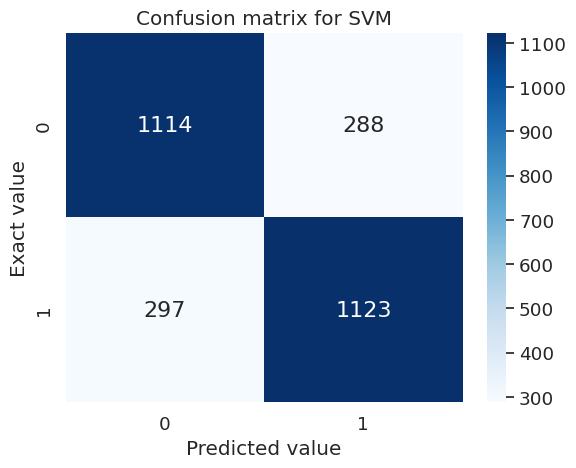

In [ ]:
con_matrrix = confusion_matrix(y_test, y_pred_svm)
# Create a heatmap of the confusion matrix
sns.set(font_scale=1.2) # set font size
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')
# Add Labels and title
plt.xlabel('Predicted value')
plt.ylabel('Exact value')
plt.title('Confusion matrix for SVM')
plt.show()

## Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
acc = model.score(x_test, y_test)

print('Decision Tree Classifier scores')
print(f'Model accuracy\t\t: {acc}')
print(f'Accuracy in Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))

Decision Tree Classifier scores
Model accuracy		: 0.9365698086463501
Accuracy in Percentage	: 93.7%
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1402
           1       0.94      0.94      0.94      1420

    accuracy                           0.94      2822
   macro avg       0.94      0.94      0.94      2822
weighted avg       0.94      0.94      0.94      2822



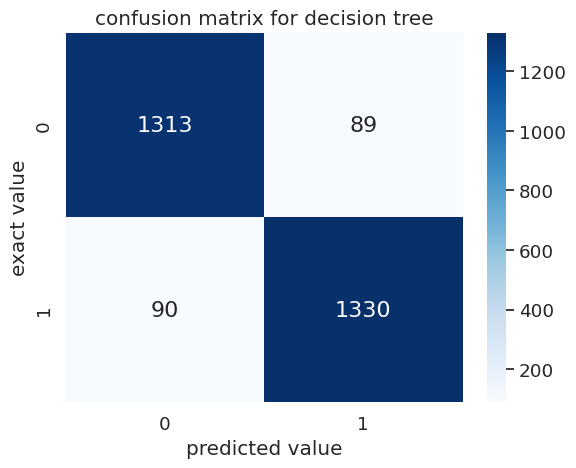

In [ ]:
con_matrrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix

sns.set(font_scale=1.2) # Set font size

sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') # Create heatmap

#Add Labels and title

plt.xlabel('predicted value')

plt.ylabel('exact value')

plt.title('confusion matrix for decision tree')

plt.show()

## Boosting Techniques

[[1328   74]
 [  93 1327]]
0.940822111977321
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1402
           1       0.95      0.93      0.94      1420

    accuracy                           0.94      2822
   macro avg       0.94      0.94      0.94      2822
weighted avg       0.94      0.94      0.94      2822



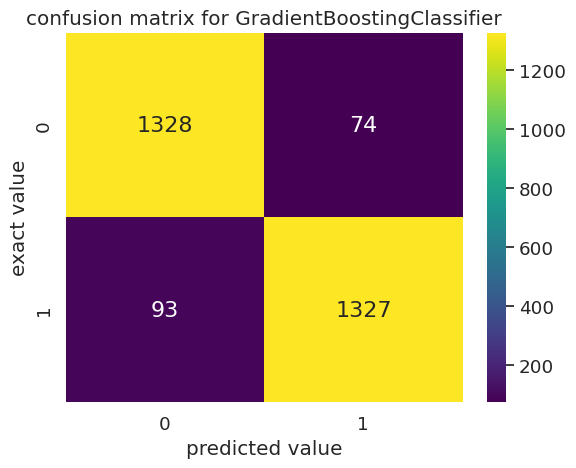

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster=GradientBoostingClassifier()
gradient_booster.fit(x_train,y_train)
y_pred_gradboost=gradient_booster.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_gradboost))
print(accuracy_score(y_test,y_pred_gradboost))
print(classification_report(y_test,y_pred_gradboost))

#Heatmap
con_matrrix = confusion_matrix(y_test, y_pred_gradboost)
sns.set(font_scale=1.2)
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='viridis', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for GradientBoostingClassifier')
plt.show()

[[1303   99]
 [ 106 1314]]
0.9273564847625797
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1402
           1       0.93      0.93      0.93      1420

    accuracy                           0.93      2822
   macro avg       0.93      0.93      0.93      2822
weighted avg       0.93      0.93      0.93      2822



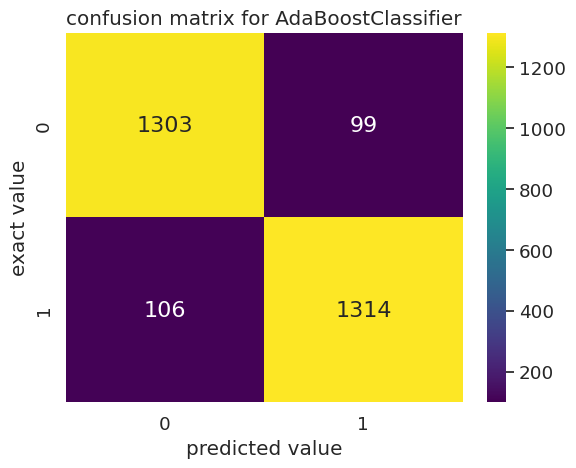

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
y_pred_abc=abc.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_abc))
print(accuracy_score(y_test,y_pred_abc))
print(classification_report(y_test,y_pred_abc))

#Heatmap
con_matrrix = confusion_matrix(y_test, y_pred_abc)
sns.set(font_scale=1.2)
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='viridis', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for AdaBoostClassifier')
plt.show()

In [ ]:
!pip install xgboost

[[1341   61]
 [  62 1358]]
0.9564138908575478
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1402
           1       0.96      0.96      0.96      1420

    accuracy                           0.96      2822
   macro avg       0.96      0.96      0.96      2822
weighted avg       0.96      0.96      0.96      2822



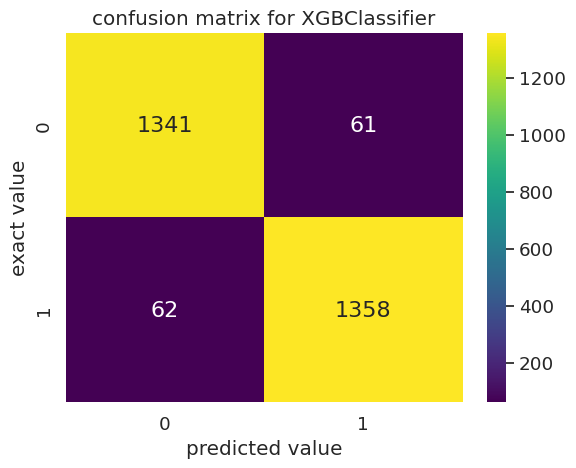

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier(learning_rate=1)
model.fit(x_train,y_train)
y_pred_xgb=model.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_xgb))
print(accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

#Heatmap
con_matrrix = confusion_matrix(y_test, y_pred_xgb)
sns.set(font_scale=1.2)
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='viridis', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for XGBClassifier')
plt.show()

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 1.8 MB/s eta 0:00:00


0:	learn: 0.2288425	total: 58.3ms	remaining: 58.2s
1:	learn: 0.1697776	total: 87.4ms	remaining: 43.6s
2:	learn: 0.1492456	total: 105ms	remaining: 35s
3:	learn: 0.1350660	total: 124ms	remaining: 30.9s
4:	learn: 0.1219701	total: 130ms	remaining: 25.9s
5:	learn: 0.1140975	total: 138ms	remaining: 22.8s
6:	learn: 0.1081132	total: 147ms	remaining: 20.9s
7:	learn: 0.1025827	total: 166ms	remaining: 20.6s
8:	learn: 0.0971467	total: 171ms	remaining: 18.8s
9:	learn: 0.0952733	total: 175ms	remaining: 17.4s
10:	learn: 0.0883524	total: 181ms	remaining: 16.3s
11:	learn: 0.0828438	total: 187ms	remaining: 15.4s
12:	learn: 0.0771139	total: 192ms	remaining: 14.6s
13:	learn: 0.0728189	total: 198ms	remaining: 13.9s
14:	learn: 0.0706904	total: 203ms	remaining: 13.3s
15:	learn: 0.0683662	total: 208ms	remaining: 12.8s
16:	learn: 0.0657723	total: 214ms	remaining: 12.4s
17:	learn: 0.0636995	total: 220ms	remaining: 12s
18:	learn: 0.0615648	total: 232ms	remaining: 12s
19:	learn: 0.0594675	total: 248ms	remaining: 

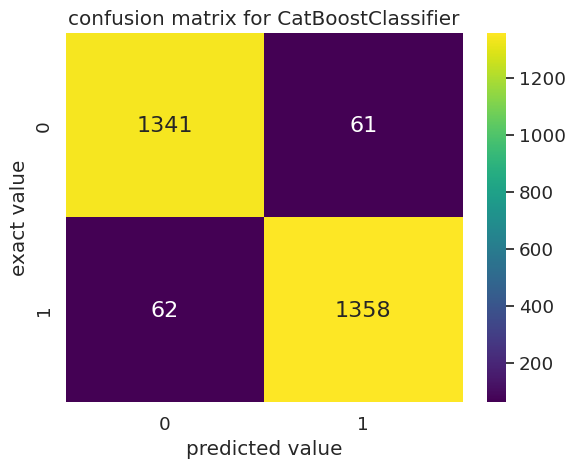

In [ ]:
from catboost import CatBoostClassifier
model1=CatBoostClassifier(learning_rate=1)
model1.fit(x_train,y_train)
y_pred_cat=model.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_cat))
print(accuracy_score(y_test,y_pred_cat))
print(classification_report(y_test,y_pred_cat))

#Heatmap
con_matrrix = confusion_matrix(y_test, y_pred_cat)
sns.set(font_scale=1.2)
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='viridis', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for CatBoostClassifier')
plt.show()

## Ensemble

In [ ]:
#Ensemble using classifiers
from sklearn.ensemble import VotingClassifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('knn', knn),
        ('logreg', logreg),
        ('svm', SVC(C=0.001, kernel='linear', probability=True)),  # Set probability=True
        ('dt', model),
        ('rf', rf_classifier)
    ],
    voting='soft'
)
ensemble_classifier.fit(x_train, y_train)

ensemble_predictions = ensemble_classifier.predict(x_test)
print('Accuracy:', accuracy_score(y_test, ensemble_predictions))
print('Recall:', recall_score(y_test, ensemble_predictions))
print('Precision:', precision_score(y_test, ensemble_predictions))
print('f1 score:', f1_score(y_test, ensemble_predictions))


In [ ]:
#Ensemble of classifiers using boosting tehcniques
ensemble_classifier = VotingClassifier(
    estimators=[
        ('AdaBoost', abc),
        ('XGBoost', model),
        ('CatBoost', model1),
        ('GradientBoost', gradient_booster),
    ],
    voting='soft' )

ensemble_classifier.fit(x_train, y_train)

ensemble_predictions = ensemble_classifier.predict(x_test)
print('Accuracy:',accuracy_score(y_test,ensemble_predictions))
print('Recall:',recall_score(y_test,ensemble_predictions))
print('Precision:',precision_score(y_test,ensemble_predictions))
print('f1 score:',f1_score(y_test,ensemble_predictions))


In [ ]:
#Ensemble using classifiers
from sklearn.ensemble import VotingClassifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('XGBoost', model),
        ('CatBoost', model1),
        ('svm', SVC(C=0.001, kernel='linear', probability=True)),  # Set probability=True
        ('dt', model),
    ],
    voting='soft'
)
ensemble_classifier.fit(x_train, y_train)

ensemble_predictions = ensemble_classifier.predict(x_test)
print('Accuracy:', accuracy_score(y_test, ensemble_predictions))
print('Recall:', recall_score(y_test, ensemble_predictions))
print('Precision:', precision_score(y_test, ensemble_predictions))
print('f1 score:', f1_score(y_test, ensemble_predictions))


In [ ]:
input_data = (1,50,0,2643,4,4,4,4,4,4,5,5,5,4,5,5,0,0,0,12,50,0,0,9)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction =logreg.predict(input_data_reshape)

if prediction == 1:

    print('Passenger satisfied!!!')

else:

    print('Passenger Neutral or Dissatisfied')

## LIME and SHAP

In [ ]:
!pip install lime

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
explainer=LimeTabularExplainer(x_test.values,feature_names=x_test.columns.values.tolist(),class_names=['satisfaction'],mode='regression')
exp=explainer.explain_instance(x_test.values[45],clf.predict,num_features=16)
exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
exp.show_in_notebook(show_table=True)
plt.savefig('lime.png')

In [ ]:
!pip install shapash

In [ ]:
model=RandomForestClassifier(max_depth=5,random_state=42,n_estimators=12)
model2=model.fit(x_train,y_train)
rf_y_pred=model.predict(x_test)
rf_y_pred

In [ ]:
from shapash.explainer.smart_explainer import SmartExplainer
xp1=SmartExplainer(model2)
xp1.compile(x=x_test)
xp1.plot.features_importance()
plt.savefig('shap.png')

In [ ]:
import random
subset=random.choices(x_test.index,k=50)
xp1.plot.features_importance(selection=subset)